In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn

import dg1
import plotting

seaborn.set_palette('husl')


TOTAL_TIME = 1.0
INTERVAL_WIDTH = 1.0

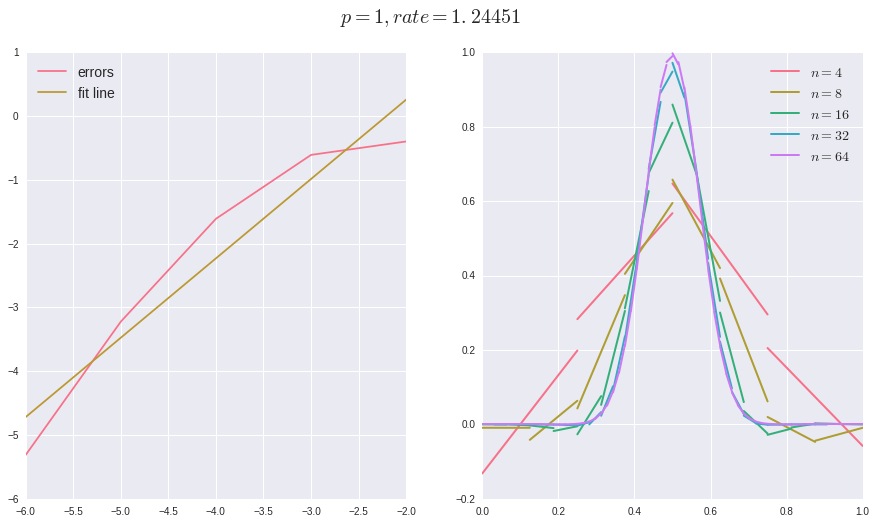

In [2]:
# Convergence test for p = 1.

# Prepare plots.
rows, cols = 1, 2
fig, (ax1, ax2) = plt.subplots(rows, cols)

# Prepare mesh sizes.
NUM_INTERVALS = np.array([4, 8, 16, 32, 64])
DX_VALS = INTERVAL_WIDTH / NUM_INTERVALS
# For the CFL condition: dt = dx / (3 * p * p)
DT_VALS = DX_VALS / (3.0 * 1 * 1)
COLORS = seaborn.color_palette('husl', DT_VALS.size)

# Compute solution on various meshes.
log2_h = []
log2_errs = []
for num_intervals, dt, color in zip(NUM_INTERVALS, DT_VALS, COLORS):
    solver = dg1.DG1Solver(num_intervals=num_intervals, p_order=1, 
                           total_time=TOTAL_TIME, dt=dt)
    # Save initial solution for later comparison (though a copy is
    # not strictly needed).
    init_soln = solver.solution.copy()
    while solver.current_step != solver.num_steps:
        solver.update()

    frob_err = np.linalg.norm(init_soln - solver.solution, ord='fro')
    log2_h.append(np.log2(INTERVAL_WIDTH / num_intervals))
    log2_errs.append(np.log2(frob_err))
    interp_func = plotting.PolynomialInterpolate.from_solver(solver)
    plotted_lines = plotting.plot_solution(color, num_intervals,
                                           interp_func, solver, ax2)
    plt_label = '$n = %d$' % (num_intervals,)
    plotted_lines[0].set_label(plt_label)
    
# Plot the errors.
ax1.plot(log2_h, log2_errs, label='errors')
conv_rate, fit_const = np.polyfit(log2_h, log2_errs, deg=1)
fit_line = conv_rate * np.array(log2_h) + fit_const
ax1.plot(log2_h, fit_line, label='fit line')

# Configure the plot.
fig.set_size_inches(15, 8)
fig_title = r'$p = %d, rate = %g$' % (1, conv_rate)
fig.suptitle(fig_title, fontsize=20)
ax1.legend(loc='upper left', fontsize=14)
ax2.legend(loc='upper right', fontsize=14)
plt.show()